<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

#  K-Nearest Neighbors with scikit-learn

_Authors: Alex Sherman (DC)_

<a id="overview-of-the-iris-dataset"></a>
## Loading the Iris Data Set
---

#### Read the iris data into a pandas DataFrame, including column names.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

# not necessary with newest versions of Jupyter
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

plt.style.use('fivethirtyeight')

In [2]:
data = Path('..', 'assets', 'data', 'iris.data') # Works better cross-platform than hard-coding path as a string
iris = pd.read_csv(data)

In [3]:
iris.head(30)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


<a id="terminology"></a>

- **150 observations** (n=150): Each observation is one iris flower.
- **Four features** (p=4): sepal length, sepal width, petal length, and petal width.
- **Response**: One of three possible iris species (setosa, versicolor, or virginica)

![](../assets/images/petal_sepal.jpeg)

In the last two lessons, we built models to predict **numeric variables**, such as median housing prices. Predicting a continuous quantity in this way is called **regression**.

In the next few lessons, we build models to predict **categorical variables**, such as flower species. Predicting a discrete value in this way is called **classification**.

<a id="exercise-human-learning-with-iris-data"></a>
## Guided Practice: "Human Learning" With Iris Data

**Question:** Can we predict the species of an iris using petal and sepal measurements? Together, we will:

1. Read the iris data into a Pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use sorting, split-apply-combine, and/or visualization to look for differences between species.
4. Write down a set of rules that could be used to predict species based on iris measurements.

Define a function that accepts a row of data and returns a predicted species. Then, use that function to make predictions for all existing rows of data and check the accuracy of your predictions.

#### Gather some basic information about the data.

In [4]:
# Get the number of rows and columns in the iris dataset.
# /scrub/
iris.shape

(150, 5)

In [5]:
# Check the data types
# /scrub/
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
# Verify the basic stats look appropriate
# /scrub/
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Test for imbalanced classes
# /scrub/
iris.loc[:, 'species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

In [8]:
# Verify we are not missing any data
# /scrub/
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### Use sorting, split-apply-combine, and/or visualization to look for differences between species.

In [9]:
# Mean of all numeric columns, grouped by species.
# /scrub/
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


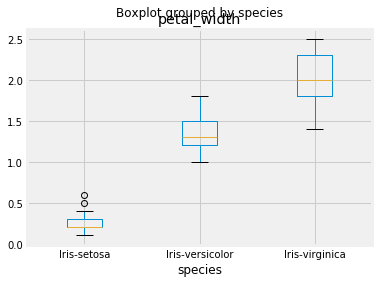

In [10]:
# Box plot of petal_width, grouped by species.
# Using .boxplot() convenience method, which returns its Axes
# /scrub/
ax = iris.boxplot(column='petal_width', by='species');

/Users/gGandenberger/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/plotting/_core.py:2257: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


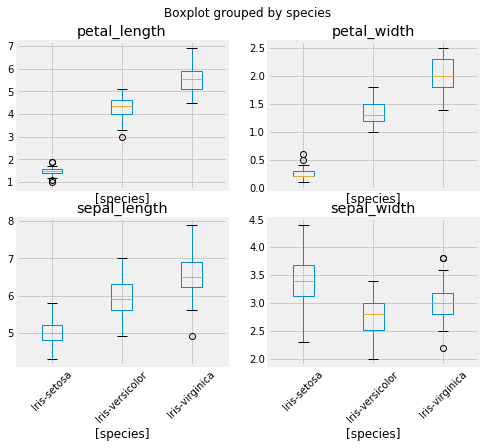

In [11]:
# Box plot of all numeric columns, grouped by species.
# /scrub/
fig, ax = plt.subplots(2, 2, figsize=(8, 6), sharex=True)  # Need to do it this way so that we can turn off `sharey`
iris.boxplot(by='species', rot=45, ax=ax);

In [12]:
# Map species to a numeric value so that plots can be colored by species.
# /scrub/
iris.loc[:, 'species_num'] = iris.loc[:, 'species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [13]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


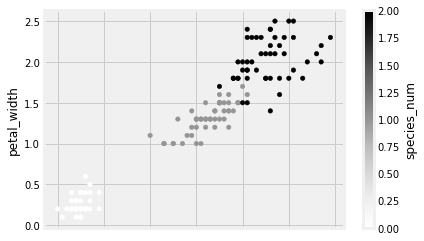

In [14]:
# Scatterplot of petal_length vs. petal_width, colored by species
# /scrub/
ax = iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num')

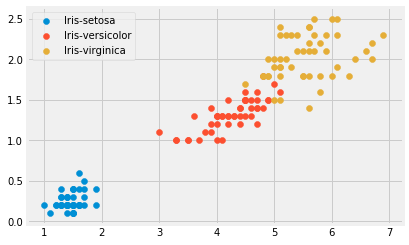

In [15]:
# Ack -- continuous colorbar is not appropriate.
# Better approach:
# /scrub/
fig, ax = plt.subplots()
for species in iris.loc[:, 'species'].unique():
    ax.scatter(data=iris.loc[iris.loc[:, 'species'] == species, :], x='petal_length', y='petal_width', label=species)
    ax.legend();

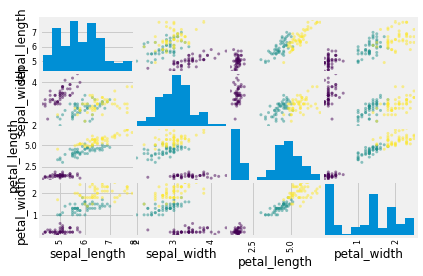

In [16]:
# Scatter matrix of all features, colored by species.
# scatter_matrix returns 2D array of Axes
# /scrub/
ax_array = pd.plotting.scatter_matrix(iris.drop('species_num', axis=1), c=iris.loc[:, 'species_num']);

**Exercise (3 mins.)**

To illustrate how classifiers work, write down a set of rules for classifying iris species in the following form:

1. If XYZ, choose Species A.
2. Otherwise if ABC, choose Species B.
3. Otherwise, choose Species C.

Don't expect perfect results -- in real machine learning problems, perfect accuracy is impossible.

$\blacksquare$


#### Example

In [17]:
# Define a new feature that represents petal area ("feature engineering").
# As iris petals are more ovular shaped as opposed to rectangular,
# we're going to use the formula for area of an ellipse:
# r1 * r2 * 3.14.
# /scrub/
iris.loc[:, 'petal_area'] = ((iris.loc[:, 'petal_length']/2) * (iris.loc[:, 'petal_width']/2) * 3.14)

In [18]:
# Description of petal_area, grouped by species.
# /scrub/
iris.groupby('species')['petal_area'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Iris-setosa,50.0,0.284798,0.143850,0.08635,0.208025,0.235500,0.32970,0.75360
Iris-versicolor,50.0,4.490514,1.074196,2.59050,3.815100,4.407775,5.29875,6.78240
Iris-virginica,50.0,8.867517,1.693569,5.88750,7.628238,8.984325,10.04015,12.45795


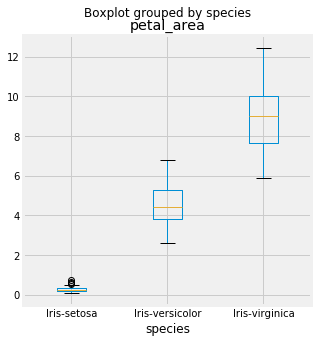

In [19]:
# Box plot of petal_area, grouped by species.
# /scrub/
iris.boxplot(column='petal_area', by='species', figsize=(5,5));

In [20]:
# Only show irises with a petal_area between 5 and 8.
# /scrub/
iris[(iris.loc[:, 'petal_area'] > 5) & (iris.loc[:, 'petal_area'] < 8)].sort_values('petal_area')

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,petal_area
91,6.1,3.0,4.6,1.4,Iris-versicolor,1,5.05540
50,7.0,3.2,4.7,1.4,Iris-versicolor,1,5.16530
63,6.1,2.9,4.7,1.4,Iris-versicolor,1,5.16530
76,6.8,2.8,4.8,1.4,Iris-versicolor,1,5.27520
84,5.4,3.0,4.5,1.5,Iris-versicolor,1,5.29875
68,6.2,2.2,4.5,1.5,Iris-versicolor,1,5.29875
78,6.0,2.9,4.5,1.5,Iris-versicolor,1,5.29875
51,6.4,3.2,4.5,1.5,Iris-versicolor,1,5.29875
66,5.6,3.0,4.5,1.5,Iris-versicolor,1,5.29875
54,6.5,2.8,4.6,1.5,Iris-versicolor,1,5.41650


My set of rules for predicting species:

- If petal_area is less than 2, predict **setosa**.
- Else if petal_area is less than 6, predict **versicolor**.
- Otherwise, predict **virginica**.

**Exercise (6 mins.)** Implement these rules to make your own classifier!

Write a function that accepts a row of data and returns a predicted species. Then, apply that function to `iris` to make predictions for all existing rows of data and check the accuracy of your predictions.

In [21]:
# Starter code

def predict_flower(row):
    if row.loc['petal_area'] < 2:
        prediction = 'Iris-setosa'
#     What about the other cases?
    return prediction

# Apply your classifier row-wise
iris.loc[:, 'prediction'] = None
# /scrub/
def predict_flower(row):
    if row.loc['petal_area'] < 2:
        prediction = 'Iris-setosa'
    elif row.loc['petal_area'] < 6:
        prediction = 'Iris-versicolor'
    else:
        prediction = 'Iris-virginica'
    return prediction
    
iris.loc[:, 'prediction'] = iris.apply(predict_flower, axis=1)

$\blacksquare$

### Examine results

In [22]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,petal_area,prediction
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0.2198,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0.2198,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0.2041,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0.2355,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0.2198,Iris-setosa


In [23]:
# Let's see what percentage your manual classifier gets correct!
# 0.3333 means 1/3 are classified correctly
# /scrub/

sum(iris.loc[:, 'species'] == iris.loc[:, 'prediction']) / 150.

0.9733333333333334

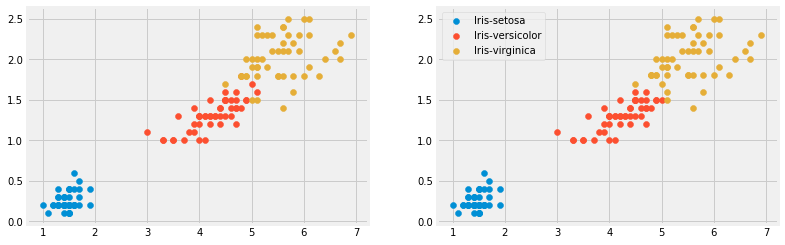

In [24]:
# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES and by PREDICTED SPECIES.
# /scrub/

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
for species in iris.loc[:, 'species'].unique():
    axes[0].scatter(data=iris.loc[iris.loc[:, 'species'] == species, :], x='petal_length', y='petal_width', label=species)
    axes[1].scatter(data=iris.loc[iris.loc[:, 'prediction'] == species, :], x='petal_length', y='petal_width', label=species)
    axes[1].legend();

<a id="human-learning-on-the-iris-dataset"></a>
## Human Learning on the Iris Data Set
---

How did we (as humans) predict the species of an iris?

1. We observed that the different species had (somewhat) dissimilar measurements.
2. We focused on features that seemed to correlate with the response.
3. We created a set of rules (using those features) to predict the species of an unknown iris.

We assumed that if an **unknown iris** had measurements similar to **previous irises**, then its species was most likely the same as those previous irises.

<a id="k-nearest-neighbors-knn-classification"></a>
## K-Nearest Neighbors (KNN) Classification
---

Predict that the value of the target variable for an iris is the most popular value among its K "nearest neighbors."

Which points count as "nearest neighbors" depend on how you measure distance. The most common approach is to use Euclidean distance (square root of the sum of squared differences) in the feature space. 

The plots below illustrate KNN for various k and two features: `x='sepal_length'` and `y='sepal_width'`. The points are the values in the training set, and the background colors indicate what we would predict for values in the test set.

<a id="knn-classification-map-for-iris-k"></a>
### KNN Classification Map for Iris (K=1)

![1NN classification map](../assets/images/iris_01nn_map.png)

### KNN Classification Map for Iris (K=5)

![5NN classification map](../assets/images/iris_05nn_map.png)

### KNN Classification Map for Iris (K=15)

![15NN classification map](../assets/images/iris_15nn_map.png)

<a id="knn-classification-map-for-iris-k"></a>
### KNN Classification Map for Iris (K=50)

![50NN classification map](../assets/images/iris_50nn_map.png)

**Exercise (2 mins., post to Slack right away.)**

- How does increasing $k$ affect the bias and the variance of a KNN model?

/scrub/

It decreases the variance and increases the bias. Increasing $k$ yields a smoother model, which can't fit as large a variety of patterns but is less sensitive to small changes in the data.

- How can you choose a good $k$ for a particular application?

/scrub/

The same way we make all modeling choices in ML: maximize performance on a held-out test set.

$\blacksquare$

# KNN Applied to NBA Stats

For the rest of the lesson, we will be using a dataset containing the 2015 season statistics for ~500 NBA players. This dataset leads to a nice choice of K, as we'll see below. The columns we'll use for features (and the target 'pos') are:


| Column | Meaning |
| ---    | ---     |
| pos | C: Center. F: Front. G: Guard |
| ast | Assists per game | 
| stl | Steals per game | 
| blk | Blocks per game |
| tov | Turnovers per game | 
| pf  | Personal fouls per game | 

For information about the other columns, see [this glossary](https://www.basketball-reference.com/about/glossary.html).

In [25]:
# Read the NBA data into a DataFrame.
path = Path('..', 'assets', 'data', 'NBA_players_2015.csv')
nba = pd.read_csv(path)

In [26]:
nba.head()

,season_end,player,pos,age,bref_team_id,g,gs,mp,fg,fga,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,2015,Quincy Acy,F,24,NYK,52,21,19.2,2.2,4.6,...,15.1,14.7,0.6,0.5,1.0,0.050,-2.6,-0.7,-3.4,-0.3
1,2015,Jordan Adams,G,20,MEM,18,0,7.3,1.0,2.1,...,15.9,17.7,0.0,0.2,0.2,0.076,-2.3,1.8,-0.5,0.0
2,2015,Steven Adams,C,21,OKC,51,50,24.2,3.0,5.5,...,19.2,14.8,1.0,1.8,2.8,0.109,-2.0,2.0,-0.1,0.6
3,2015,Jeff Adrien,F,28,MIN,17,0,12.6,1.1,2.6,...,12.9,14.1,0.2,0.2,0.4,0.093,-2.6,0.8,-1.8,0.0
4,2015,Arron Afflalo,G,29,TOT,60,54,32.5,5.0,11.8,...,10.9,19.6,1.4,0.7,2.1,0.051,-0.2,-1.4,-1.6,0.2


In [27]:
nba.shape

(478, 49)

In [28]:
# Map positions to numbers.
# /scrub/
nba.loc[:, 'pos_num'] = nba.loc[:, 'pos'].map({'C':0, 'F':1, 'G':2})

In [29]:
# Create feature matrix (X).
# /scrub/
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']
X = nba.loc[:, feature_cols]

In [30]:
# Create response vector (y).
# /scrub/
y = nba.loc[:, 'pos_num']

<a id="using-the-traintest-split-procedure-k"></a>
### Using the Train/Test Split Procedure (K=1)

In [31]:
# Import estimator class and other sklearn tools
# /scrub/
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [32]:
# 1. Split X and y into training and testing sets (using `random_state` for reproducibility).
# /scrub/
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, shuffle=True)

In [33]:
# 2. Train the estimator on the training set (using K=1).
# /scrub/
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [34]:
# 3. Test the estimator on the testing set and check the accuracy.
# /scrub/
y_pred_class = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred_class)

0.6166666666666667

In [35]:
# Repeat for K=50.
# /scrub/
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred_class)

0.675

**Exercise (2 mins., post to Slack right away)**

- What accuracy would you expect a KNN model with $k=1$ to achieve on the *training set*? Would we expect accuracy on the training set to be higher or lower with $k=50$?

/scrub/

We would expect nearly 100% accuracy with $k=1$. The points tested on would have a distance of zero from themselves (in the training set), so the correct classes would be predicted! If we get less than 100% accuracy, then we must have some points in our data set with exactly the same values for the feature variables but not for the target variable.

Accuracy would be lower with $k=50$, because we would be using points other than the point itself to make the prediction.

$\blacksquare$

#### Comparing Testing Accuracy With Null Accuracy

For a classification model, a null model **always predicts the most frequent class**. For example, if most players in our data set are Centers, we would always predict Center. It is important to make sure that your model is outperforming the null model.

In [36]:
# first create an array with the same shape as y
# then fill it in with the most common value -- numpy "broadcasts" the sum over the whole array
# /scrub/
most_common_value = y.value_counts().idxmax()
null_pred = np.zeros(y.shape) + most_common_value
null_pred

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [37]:
# # then compare predicting the mean every time to the true values
# /scrub/
null_accuracy = metrics.accuracy_score(null_pred, y)
null_accuracy

0.41841004184100417

<a id="tuning-a-knn-model"></a>
## Getting Probabilities from a KNN Model

In [38]:
# Instantiate the estimator class (using the value K=5).
# /scrub/
knn = KNeighborsClassifier(n_neighbors=5)

In [39]:
# Fit the estimator with data.
# /scrub/
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [40]:
# /scrub/
# Store the predicted response values.
y_pred_class = knn.predict(X)
y_pred_class

array([1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1,
       1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2, 2, 0, 1, 2, 0, 2, 0,
       1, 2, 0, 1, 1, 2, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 2,
       2, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 2, 1, 2, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 1, 1,
       1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 0, 2, 0, 2, 2, 1, 2, 2, 2, 0, 1, 2,
       2, 1, 1, 1, 0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 2,
       0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 0, 0, 0, 1, 2, 0, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 0, 2, 1, 2,
       2, 2, 2, 0, 2, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1,
       0, 0, 1, 2, 0, 0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 2, 0, 2, 1, 2, 2, 2,
       2, 1, 2, 0, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 2, 1, 0, 2, 1, 1, 2, 2, 0, 2, 1, 0, 1, 1,

A classification estimator's `.predict` method returns the estimator's "categorical" predictions -- in this case, 0, 1, or 2 indicating whether the estimator thinks each player is most likely a center, forward, or guard.

A classification estimator also has a `.predict_proba` method that returns the *probabilities* that the estimator assigns to each class -- in this case, the probability that a given player is a center, is a forward, or is a guard. The `predict` method just returns the class corresponding to the highest of these probabilities.

For KNN, the probabilities that `.predict_proba` returns are just the class frequencies among the given point's K neareset neighbors.

In [41]:
# Calculate predicted probabilities of class membership.
# Each row sums to one and contains the probabilities of the point being a 0-Center, 1-Front, 2-Guard.
# /scrub/
knn.predict_proba(X)

array([[0. , 0.6, 0.4],
       [0. , 0.8, 0.2],
       [0.8, 0.2, 0. ],
       ...,
       [0. , 0.6, 0.4],
       [0.6, 0.4, 0. ],
       [0.6, 0.4, 0. ]])

<a id="what-happen-if-we-view-the-accuracy-of-our-training-data"></a>
### Accuracy as a Function of $k$

In [42]:
# /scrub/
train_scores = []
for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_train)
    score = float(sum(pred == y_train)) / len(y_train)
    train_scores.append([k, score])

In [43]:
# Store k and associated training scores in a DataFrame
# /scrub/
scores_df = pd.DataFrame(train_scores, columns=['k', 'train_score'])

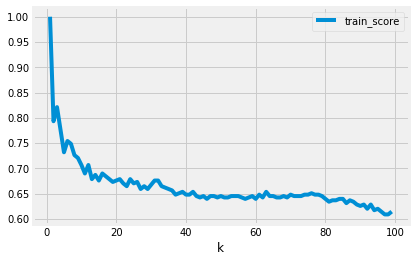

In [44]:
# Plot training scores against k
# /scrub/
ax = scores_df.plot(x='k', y='train_score')

**Exercise (2 mins., post to Slack right away.)**

- Why does the accuracy on the training set decrease as $k$ increases?

/scrub/

Increasing K gradually diminishes the influence of the point itself. It also goes from mostly eliminating outliers to mostly smoothing over the actual class boundaries, resulting in mispredictions.

$\blacksquare$

#### Search for the "best" value of K.

In [45]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.
# /scrub/
test_scores = []

X_train, X_test, y_train, y_test = (
    train_test_split(X, y, random_state=99, shuffle=True)
)

for k in range(1, 100):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    test_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    test_scores.append(test_accuracy)

In [46]:
# Add test scores to `scores_df`
# /scrub/
scores_df.loc[:, 'test_score'] = test_scores

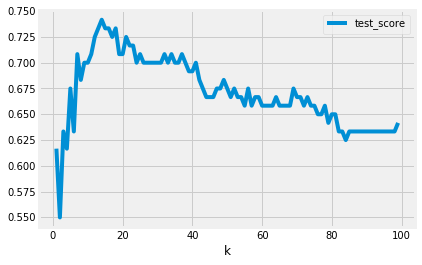

In [47]:
# Plot test scores against k
# /scrub/
ax = scores_df.plot(x='k', y='test_score')

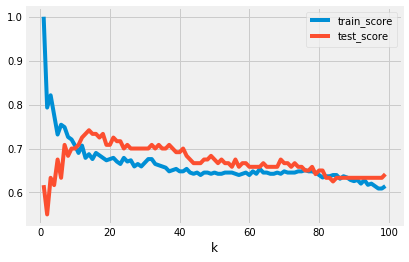

In [48]:
# Plot train scores and test scores together
# /scrub/
ax = scores_df.plot(x='k')

In [49]:
# Find the minimum testing error and the associated K value.
# /scrub/
scores_df.sort_values('test_score', ascending=False).head()

,k,train_score,test_score
13,14,0.687151,0.741667
17,18,0.678771,0.733333
15,16,0.689944,0.733333
14,15,0.675978,0.733333
12,13,0.678771,0.733333


- **Training error** decreases as model complexity increases (lower value of K).
- **Testing error** is minimized at the optimum model complexity.

**Evaluating training and testing error:**

- If training error is unacceptably high, then you have a bias problem.
- If training error is low enough but there is a big gap between training and test error, then you have a variance problem.

**Conclusions**

- When using KNN on this data set with these features, the **best value for K** is likely to be around 14.
- Given the statistics of an **unknown player**, we estimate that we would be able to correctly predict his position about 74% of the time.

<a id="standardizing-features"></a>
## Standardizing Features
---

Many machine learning models are sensitive to feature scale. 

> KNN in particular is sensitive to feature scale because it (by default) uses the Euclidean distance metric. To determine closeness, Euclidean distance sums the square difference along each axis. So, if one axis has large differences and another has small differences, the former axis will contribute much more to the distance than the latter axis.

This means that it matters whether our feature are centered around zero and have similar variance to each other.

In the case of KNN on the iris data set, imagine we measure sepal length in kilometers, but we measure sepal width in millimeters. Our data will show variation in sepal width, but almost no variation in sepal length.

Unfortunately, KNN cannot automatically adjust to this. Other models tend to struggle with scale as well, even linear regression, when you get into more advanced methods such as regularization.

Fortunately, this is an easy fix.

<a id="use-standardscaler-to-standardize-our-data"></a>
### Use `StandardScaler` to Standardize our Data

StandardScaler standardizes our data by subtracting the mean from each feature and dividing by its standard deviation.

In [50]:
# Create feature matrix (X).
# /scrub/
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']

X = nba.loc[:, feature_cols]
y = nba.loc[:, 'pos_num']  # Create response vector (y).

In [51]:
# Create the train/test split.
# Notice that we create the train/test split first before fitting the StandardScaler
# /scrub/
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [52]:
# Instantiate and fit `StandardScaler`.
# /scrub/
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Fit a KNN estimator and look at the testing error.
Can you find a number of neighbors that improves our results from before?

In [53]:
# Calculate testing error.
# /scrub/
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
testing_error = 1 - testing_accuracy

print(testing_error)

0.32499999999999996


<a id="comparing-knn-with-other-models"></a>
## Comparing KNN With Other Models
---

**Advantages of KNN:**

- It's simple to understand and explain.
- Model training is fast.
- It can be used for classification and regression! (For regression, take the average value of the K nearest points.)
- Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.

**Disadvantages of KNN:**

- It must store all of the training data.
- Its prediction phase can be slow when n is large.
- It is sensitive to irrelevant features.
- It is sensitive to the scale of the data.
- Accuracy is (generally) not competitive with the best supervised learning methods.